In [269]:
import pandas as pd

In [270]:
df=pd.read_csv('titanic_train.csv')

In [271]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [273]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0, 0.5, 'ID')

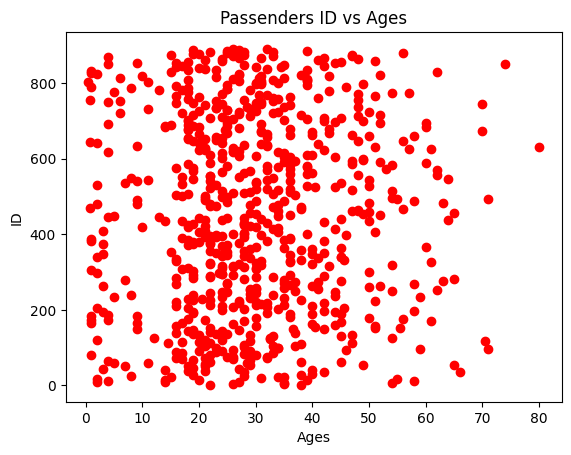

In [274]:
import matplotlib.pyplot as plt


plt.scatter(df.Age,df.PassengerId, c ='r')
plt.title('Passenders ID vs Ages')
plt.xlabel('Ages')
plt.ylabel('ID')

([<matplotlib.patches.Wedge at 0x79b82fa143d0>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'Not Survived'),
  Text(0.3925750313068116, -1.0275625746369201, 'Survived')])

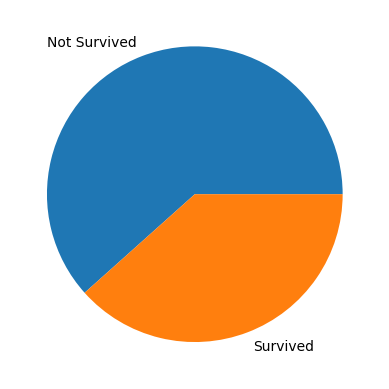

In [275]:
survived_count=df['Survived'].value_counts()
plt.pie(survived_count,labels=['Not Survived','Survived'])

<BarContainer object of 2 artists>

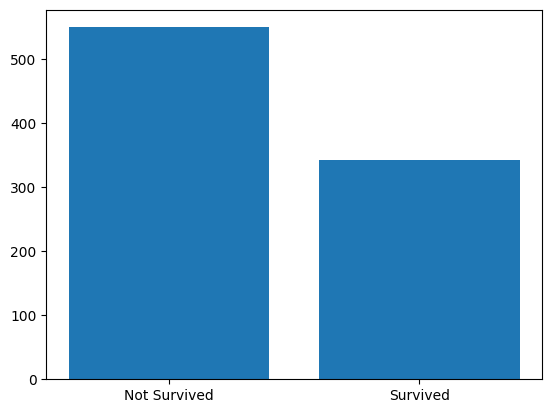

In [276]:
plt.bar(['Not Survived','Survived'],survived_count)

## Check the Missing Values

In [277]:
df.shape

(891, 12)

In [278]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [279]:
df.Age.isnull().sum()

177

In [280]:
#df['Age']=df['Age'].fillna(0).astype(int)

In [281]:
df['Age'].mean()

29.69911764705882

In [282]:
df['Age']=df['Age'].fillna(df['Age'].mean()).astype(int)

In [283]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [284]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [285]:
#df['Embarked']=df['Embarked'].fillna('U')

In [286]:
df.shape

(891, 12)

In [287]:
df=df.dropna(subset=['Embarked'])

In [288]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [289]:
df.shape

(889, 12)

* axis : 0.   row

* axis : 1.   column

In [290]:
df=df.drop(["Cabin","Fare","PassengerId","Ticket","Pclass","Name"],axis=1)

In [291]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Embarked
0,0,male,22,1,0,S
1,1,female,38,1,0,C
2,1,female,26,0,0,S
3,1,female,35,1,0,S
4,0,male,35,0,0,S


In [292]:
df.isnull().sum()

Survived    0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

## Enocding from Categorical to Numerical

In [293]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [294]:
df['Sex']=df['Sex'].map({'male':1,'female':0})

In [295]:
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})

In [296]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Embarked
0,0,1,22,1,0,0
1,1,0,38,1,0,1
2,1,0,26,0,0,0
3,1,0,35,1,0,0
4,0,1,35,0,0,0


In [297]:
df['Embarked'].unique()

array([0, 1, 2])

## Feature Engineering

In [298]:
df['FamilySize']=df['SibSp'] + df [ 'Parch' ] +1

In [299]:
df=df.drop(['SibSp','Parch'],axis=1)

In [300]:
df.head()

,Survived,Sex,Age,Embarked,FamilySize
0,0,1,22,0,2
1,1,0,38,1,2
2,1,0,26,0,1
3,1,0,35,0,2
4,0,1,35,0,1


In [305]:
from sklearn.preprocessing import MinMaxScaler


scaler=MinMaxScaler()

df[['Age']]=scaler.fit_transform(df[['Age']])

In [303]:
df.head()

,Survived,Sex,Age,Embarked,FamilySize
0,0,1,0.2750,0,2
1,1,0,0.4750,1,2
2,1,0,0.3250,0,1
3,1,0,0.4375,0,2
4,0,1,0.4375,0,1


In [306]:
X=df[['Sex','Age','Embarked','FamilySize']]

In [307]:
X

,Sex,Age,Embarked,FamilySize
0,1,0.2750,0,2
1,0,0.4750,1,2
2,0,0.3250,0,1
3,0,0.4375,0,2
4,1,0.4375,0,1
...,...,...,...,...
886,1,0.3375,0,1
887,0,0.2375,0,1
888,0,0.3625,0,4
889,1,0.3250,1,1


In [312]:
y=df['Survived']

In [313]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [316]:
def add_and_sub(x,y):
  return x+y, x-y


add,sub=add_and_sub(2,3)

(5, -1)

In [323]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [324]:
len(X)

889

In [325]:
len(X_train)

711

In [326]:
len(X_test)

178

In [322]:
X_train

,Sex,Age,Embarked,FamilySize
351,1,0.3625,0,1
125,1,0.1500,1,2
578,0,0.3625,1,2
423,0,0.3500,0,3
119,0,0.0250,0,7
...,...,...,...,...
837,1,0.3625,0,1
193,1,0.0375,0,3
630,1,1.0000,0,1
560,1,0.3625,2,1


# OverSampling Under Sampling

In [335]:
train_data=pd.concat([X_train,y_train],axis=1)


majorityclass=train_data[train_data['Survived']==0]
minorityclass=train_data[train_data['Survived']==1]



undersample_majority=majorityclass.sample(n=len(minorityclass),random_state=0)

undersampled_data=pd.concat([undersample_majority,minorityclass])

undersampled_data.head()

,Sex,Age,Embarked,FamilySize,Survived
592,1,0.5875,0,1,0
491,1,0.2625,0,1,0
51,1,0.2625,0,1,0
817,1,0.3875,1,3,0
799,0,0.3750,0,3,0


(534, 5)

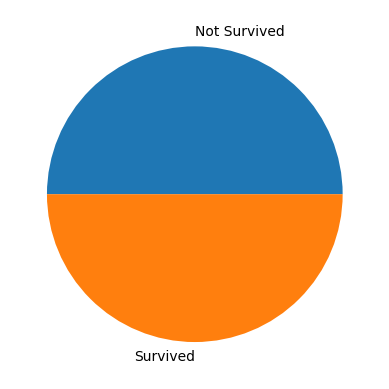

In [337]:
survived_count=undersampled_data['Survived'].value_counts()
plt.pie(survived_count,labels=['Not Survived','Survived'])
undersampled_data.shape